In [35]:
import pandas as pd
import re
from pattern.text.en import singularize
from spellchecker import SpellChecker
spell = SpellChecker()
from tqdm import tqdm_notebook as tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('other')
import string
import enchant
import pickle
d = enchant.Dict("en_US")
tqdm().pandas()
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

## Finding main objects

In [7]:
def datafram_from_csv(file_path):
    df = pd.read_csv(file_path,encoding='latin1')
    return df

In [8]:
def get_concat_data(list_of_files):
    list_of_df = [datafram_from_csv(i) for i in list_of_files]
    df = pd.concat(list_of_df, axis=0, ignore_index=True)
    return df

In [44]:
df = get_concat_data(['data/Insta_labeled_data/image_labels_0plus_to_10_.csv','data/Insta_labeled_data/image_labels_10plus_to_40.csv','data/Insta_labeled_data/image_labels_40plus.csv'])

In [45]:
df.head()

,id_image,label_image
0,https://scontent.cdninstagram.com/hphotos-xaf1...,Person Person\nCelebrity\nClothes\nText Pers...
1,https://scontent.cdninstagram.com/hphotos-xap1...,Person Celebrity celebritÃ Person
2,https://scontent.cdninstagram.com/hphotos-xap1...,Nature\nPerson\nClothes\nFood Person\nFood P...
3,https://scontent.cdninstagram.com/hphotos-xaf1...,Cartoon Other art dontknow
4,https://scontent.cdninstagram.com/hphotos-xap1...,Clothes Clothes Clothes


In [57]:
duplicate_map = {
 'acres':'adress',
 'advertisment':'advertising',
    'ad':'advertising',
    'animals':'animal',
    'bicycle':'bike',
    'broke':'broken',
    'buildingslandmark':'building',
    'celebrating':'celebration',
    'cigar':'cigarette',
    'cloth':'clothe',
    'clubbing':'club',
    'musical':'music',
    'paintdrawing':'painting',
    'art':'painting',
    'artwork':'painting',
    'tv':'television',
    'showing':'show',
    'dontknow': '',
    'figurine':'figure',
    'graffiti':'graphics',
    'glas':'glass',
    'golden':'gold',
    'gras':'grass',
    'home':'house',
    'instruments':'instrument',
    'kids':'kid',
    'loading':'load',
    'motorbike':'motorcycle',
    'sex':'sensual',
    'sexy':'sensual'
}

In [49]:
objects = [spell.correction(singularize(j.lower())) for i in tqdm(df['label_image'].tolist()) for j in re.split(' |\n', i) if j!='']

In [70]:
objects = [word for word in objects if word not in stop_words]
objects = [s.translate(str.maketrans('','',string.punctuation)) for s in objects]
objects = [duplicate_map[i] if i in duplicate_map.keys() else i for i in objects]
objects = [word for word in objects if word not in ['','ð¸ð½ñ\x82ðµñ\x80ñ\x8cðµñ\x80','ñ\x80ðµðºð»ð°ð¼ð°','load','picture','photo','nice','content','love']]

In [71]:
unique_objects = set(objects)
len(unique_objects)

392

In [72]:
unique_objects

{'accessory',
 'action',
 'address',
 'adress',
 'advertising',
 'advice',
 'airplane',
 'airport',
 'alcohol',
 'animal',
 'apple',
 'area',
 'areawiev',
 'arena',
 'arm',
 'army',
 'article',
 'artist',
 'atelier',
 'auditorium',
 'automotive',
 'baby',
 'backpack',
 'bag',
 'bamboo',
 'banner',
 'barro',
 'baseball',
 'basketball',
 'bathroom',
 'beauty',
 'bed',
 'bedroom',
 'behavior',
 'best',
 'bike',
 'bikini',
 'black',
 'body',
 'book',
 'boot',
 'booty',
 'boy',
 'broken',
 'bu',
 'building',
 'burned',
 'businesscard',
 'buy',
 'cake',
 'camera',
 'campaign',
 'car',
 'card',
 'care',
 'cartoon',
 'cat',
 'cd',
 'celebration',
 'celebrity',
 'cellphone',
 'chair',
 'chandelier',
 'christmas',
 'church',
 'cigarette',
 'city',
 'clock',
 'clothe',
 'cloud',
 'club',
 'coffee',
 'colm',
 'company',
 'computer',
 'concert',
 'concussion',
 'cool',
 'coral',
 'couple',
 'craft',
 'crashed',
 'crayon',
 'cup',
 'currency',
 'dance',
 'demonstration',
 'desktop',
 'destruction',


In [74]:
final_objects =[]
extras = []
result = sorted([(x, objects.count(x)) for x in unique_objects], key=lambda y: y[1])
for elem in result:
    if elem[1]>=5:
        final_objects.append(elem[0])
    else:
        extras.append(elem[0])

In [76]:
len(final_objects)

42

In [78]:
with open('data/DATA_I_MADE/final_objects.pkl', 'wb') as fp:
    pickle.dump(final_objects, fp)

with open('data/DATA_I_MADE/extra_onjects.pkl', 'wb') as fp:
    pickle.dump(extras, fp)

## Objects in each row

In [89]:
with open('data/DATA_I_MADE/final_objects.pkl', 'rb') as fp:
    final_objects = pickle.load(fp)

with open('data/DATA_I_MADE/extra_onjects.pkl', 'rb') as fp:
    extras = pickle.load(fp)

In [84]:
def pre_process_class(objects_str):
    objects = [spell.correction(singularize(j.lower())) for j in re.split(' |\n', objects_str) if j!='']
    objects = [word for word in objects if word not in stop_words]
    objects = [s.translate(str.maketrans('','',string.punctuation)) for s in objects]
    objects = [duplicate_map[i] if i in duplicate_map.keys() else i for i in objects]
    objects = [word for word in objects if word not in ['','ð¸ð½ñ\x82ðµñ\x80ñ\x8cðµñ\x80','ñ\x80ðµðºð»ð°ð¼ð°','load','picture','photo','nice','content','love']]
    objects = [w for w in objects if w in final_objects]
    return list(set(objects))

In [96]:
def get_object_in_row(row):
    return pre_process_class(row['label_image'])

In [101]:
df['objects'] = df.progress_apply(lambda row: get_object_in_row(row),axis=1)

In [103]:
df.head()

,id_image,label_image,objects
0,https://scontent.cdninstagram.com/hphotos-xaf1...,Person Person\nCelebrity\nClothes\nText Pers...,"[text, clothe, celebrity, person]"
1,https://scontent.cdninstagram.com/hphotos-xap1...,Person Celebrity celebritÃ Person,"[celebrity, person]"
2,https://scontent.cdninstagram.com/hphotos-xap1...,Nature\nPerson\nClothes\nFood Person\nFood P...,"[nature, clothe, food, person]"
3,https://scontent.cdninstagram.com/hphotos-xaf1...,Cartoon Other art dontknow,"[cartoon, painting, other]"
4,https://scontent.cdninstagram.com/hphotos-xap1...,Clothes Clothes Clothes,[clothe]


In [104]:
with open('data/DATA_I_MADE/objects_df.pkl', 'wb') as fp:
    pickle.dump(df, fp)

## Finding mapping

In [2]:
def closure_clean_url_link(row,link_column_name):
    def clean_url_link(row):
        return row[link_column_name].replace('\n','').replace('\r','')
    return clean_url_link(row)

Objects file links

In [3]:
with open('data/DATA_I_MADE/objects_df.pkl', 'rb') as fp:
    df = pickle.load(fp)

In [4]:
df.head()

,id_image,label_image,objects
0,https://scontent.cdninstagram.com/hphotos-xaf1...,Person Person\nCelebrity\nClothes\nText Pers...,"[text, clothe, celebrity, person]"
1,https://scontent.cdninstagram.com/hphotos-xap1...,Person Celebrity celebritÃ Person,"[celebrity, person]"
2,https://scontent.cdninstagram.com/hphotos-xap1...,Nature\nPerson\nClothes\nFood Person\nFood P...,"[nature, clothe, food, person]"
3,https://scontent.cdninstagram.com/hphotos-xaf1...,Cartoon Other art dontknow,"[cartoon, painting, other]"
4,https://scontent.cdninstagram.com/hphotos-xap1...,Clothes Clothes Clothes,[clothe]


In [5]:
df['id_image'] = df.progress_apply(lambda row: closure_clean_url_link(row,'id_image'),axis=1)

In [6]:
img_urls_object_file = df['id_image'].tolist()

final dataset file links

In [7]:
with open('data/DATA_I_MADE/final_csv_with_image_names.pkl', 'rb') as fp:
    df_labeled = pickle.load(fp)

In [8]:
df_labeled['img_url'] = df_labeled.progress_apply(lambda row: closure_clean_url_link(row,'img_url'),axis=1)

In [9]:
img_url_labeled_file = df_labeled['img_url'].tolist()

images folder link mapping

In [10]:
list_of_files = ['data/instagram_images/namesall_info_media_ids_to_collect_0plus_to_10.txt','data/instagram_images/namesall_info_media_ids_to_collect_10plus_to_40.txt','data/instagram_images/namesall_info_media_ids_to_collect_40plus.txt']
list_of_df = [pd.read_csv(i, sep=' ',names=['image_id','links']) for i in list_of_files]
df_image_folder = pd.concat(list_of_df, axis=0, ignore_index=True)

In [11]:
df_image_folder['links'] = df_image_folder.progress_apply(lambda row: closure_clean_url_link(row,'links'),axis=1)

In [12]:
img_urls_image_file = df_image_folder['links'].tolist()

Finding matches

In [13]:
len(set(img_urls_object_file)),len(set(img_url_labeled_file)),len(set(img_urls_image_file))

(2242, 2216, 1921)

In [14]:
len(set(img_urls_object_file)&set(img_url_labeled_file))

2213

In [15]:
len(set(img_urls_object_file)&set(img_urls_image_file))

138

Adding label to object rows

In [16]:
def get_label_for_link(row):
    row_label = df_labeled.loc[df_labeled['img_url'] == row['id_image']]
    if row_label.shape[0]==1:
        return row_label['label'].tolist()[0]
    else:
        return None

In [17]:
df['label']=df.progress_apply(lambda row: get_label_for_link(row),axis=1)

In [18]:
df['label'] = df['label'].replace(['bullying','aggression'],'trolled')

In [19]:
df.head()

,id_image,label_image,objects,label
0,https://scontent.cdninstagram.com/hphotos-xaf1...,Person Person\nCelebrity\nClothes\nText Pers...,"[text, clothe, celebrity, person]",normal
1,https://scontent.cdninstagram.com/hphotos-xap1...,Person Celebrity celebritÃ Person,"[celebrity, person]",normal
2,https://scontent.cdninstagram.com/hphotos-xap1...,Nature\nPerson\nClothes\nFood Person\nFood P...,"[nature, clothe, food, person]",normal
3,https://scontent.cdninstagram.com/hphotos-xaf1...,Cartoon Other art dontknow,"[cartoon, painting, other]",trolled
4,https://scontent.cdninstagram.com/hphotos-xap1...,Clothes Clothes Clothes,[clothe],normal


In [20]:
df.label.value_counts()

normal     1277
trolled     950
Name: label, dtype: int64

In [21]:
df.shape

(2260, 4)

In [22]:
df = df[df.label.notnull()]

In [23]:
df.shape

(2227, 4)

Count of objects

In [24]:
objects_list = df['objects'].tolist()

In [25]:
unique_objs = set([obj for objs in objects_list for obj in objs])

In [26]:
object_count = dict()

In [27]:
for objs in objects_list:
    for obj in objs:
        if obj not in object_count.keys():
            object_count[obj]=0
        object_count[obj]+=1

In [28]:
object_count

{'text': 627,
 'clothe': 392,
 'celebrity': 399,
 'person': 1467,
 'nature': 144,
 'food': 78,
 'cartoon': 134,
 'painting': 14,
 'other': 426,
 'shoe': 123,
 'music': 13,
 'sport': 365,
 'car': 112,
 'animal': 24,
 'pet': 9,
 'cat': 6,
 'toy': 7,
 'advertising': 4,
 'city': 6,
 'tattoo': 181,
 'phone': 7,
 'bike': 57,
 'drawing': 7,
 'meme': 5,
 'building': 13,
 'television': 3,
 'image': 22,
 'drug': 67,
 'concert': 9,
 'broken': 13,
 'sensual': 5,
 'room': 5,
 'house': 4,
 'dog': 8,
 'self': 6,
 'kid': 5,
 'game': 6,
 'watch': 4,
 'motorcycle': 3,
 'toilet': 3,
 'party': 3,
 'address': 1}

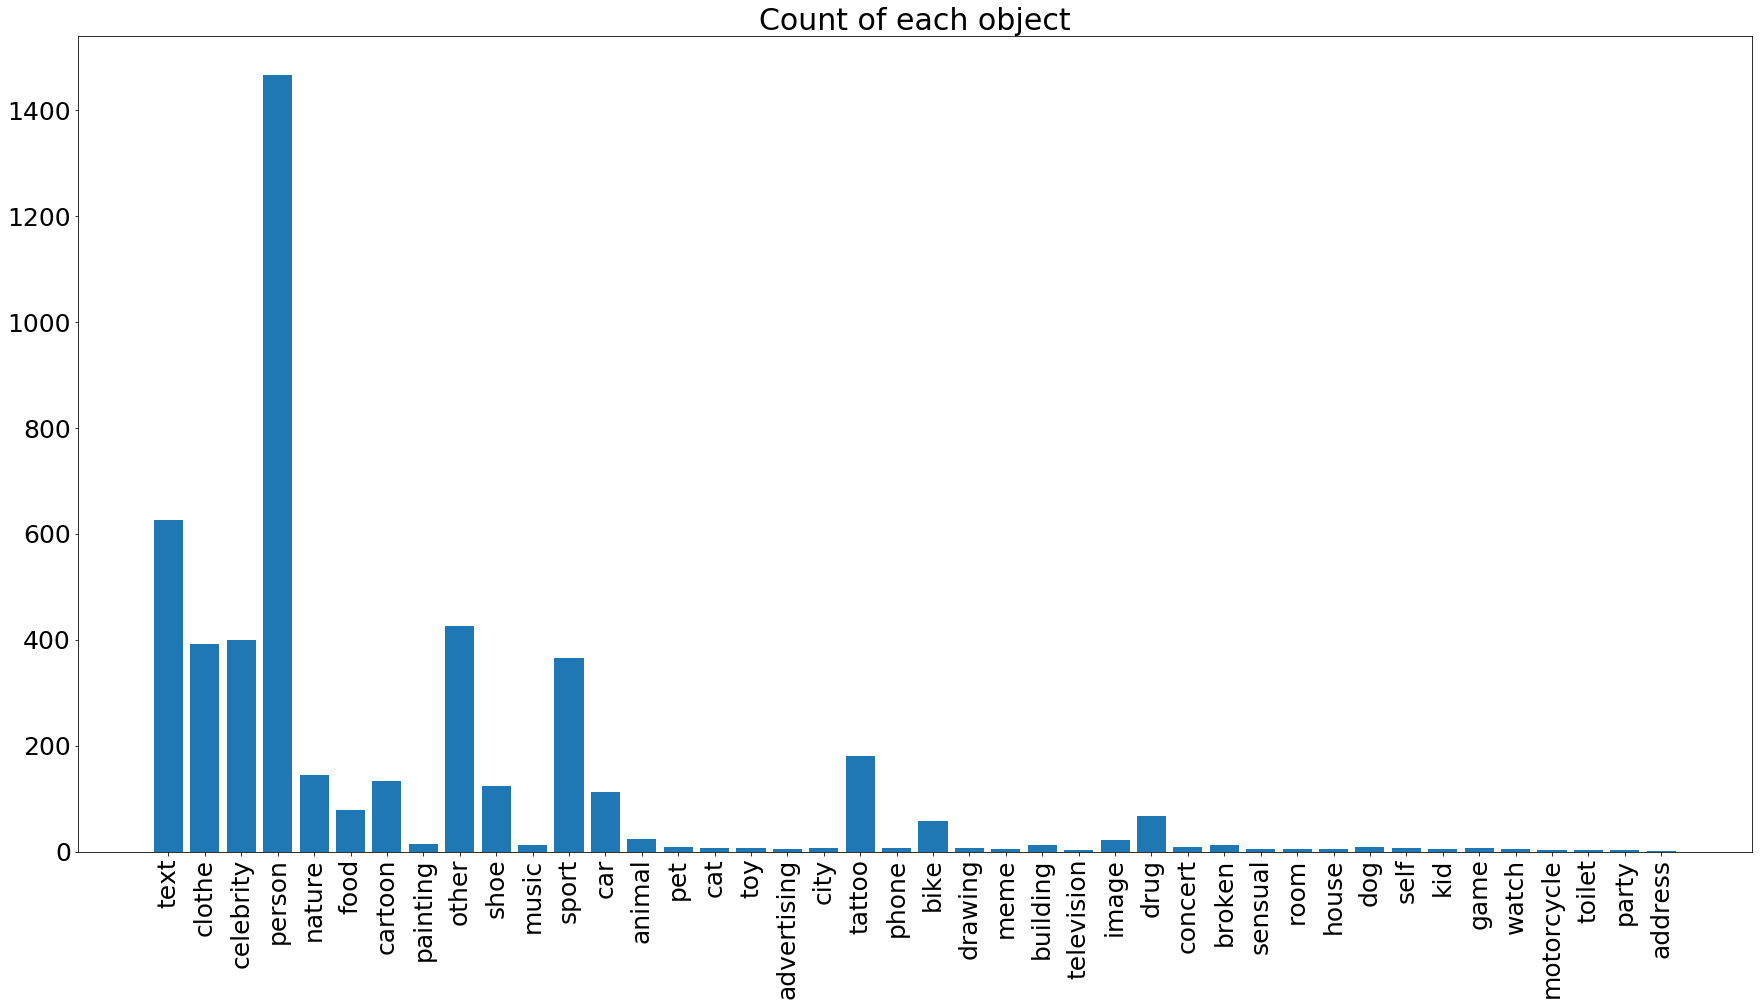

In [36]:
plt.bar(object_count.keys(), object_count.values())
plt.xticks(fontsize=25,rotation='vertical');
plt.yticks(fontsize=25);
plt.title('Count of each object',fontsize=30);

Making count dicts

In [30]:
def create_object_count_dict(dataframe):
    obj_list = dataframe['objects'].tolist()
    label = dataframe['label'].tolist()
    assert len(obj_list) == len(label)
    count_dict = dict()
    for objs,l in zip(obj_list,label):
        for obj in objs:
            if obj not in count_dict.keys():
                count_dict[obj] = {'normal':0,'trolled':0}
            count_dict[obj][l]+=1
    return count_dict

In [31]:
full_data_object_label_count_dict = create_object_count_dict(df)

In [32]:
full_data_object_label_count_dict

{'text': {'normal': 344, 'trolled': 283},
 'clothe': {'normal': 260, 'trolled': 132},
 'celebrity': {'normal': 208, 'trolled': 191},
 'person': {'normal': 796, 'trolled': 671},
 'nature': {'normal': 82, 'trolled': 62},
 'food': {'normal': 49, 'trolled': 29},
 'cartoon': {'normal': 85, 'trolled': 49},
 'painting': {'normal': 10, 'trolled': 4},
 'other': {'normal': 254, 'trolled': 172},
 'shoe': {'normal': 77, 'trolled': 46},
 'music': {'normal': 5, 'trolled': 8},
 'sport': {'normal': 202, 'trolled': 163},
 'car': {'normal': 54, 'trolled': 58},
 'animal': {'normal': 18, 'trolled': 6},
 'pet': {'normal': 8, 'trolled': 1},
 'cat': {'normal': 6, 'trolled': 0},
 'toy': {'normal': 6, 'trolled': 1},
 'advertising': {'normal': 1, 'trolled': 3},
 'city': {'normal': 3, 'trolled': 3},
 'tattoo': {'normal': 122, 'trolled': 59},
 'phone': {'normal': 6, 'trolled': 1},
 'bike': {'normal': 37, 'trolled': 20},
 'drawing': {'normal': 3, 'trolled': 4},
 'meme': {'normal': 3, 'trolled': 2},
 'building': {'

In [33]:
def plot_object_label_count(obj_label_count_dic):
    objs = obj_label_count_dic.keys()
    normal = [obj_label_count_dic[i]['normal'] for i in objs]
    trolled = [obj_label_count_dic[i]['trolled'] for i in objs]
    
    
#     N = 5
#     menMeans = (20, 35, 30, 35, 27)
#     womenMeans = (25, 32, 34, 20, 25)
#     menStd = (2, 3, 4, 1, 2)
#     womenStd = (3, 5, 2, 3, 3)
    ind = pd.np.arange(len(objs))    # the x locations for the groups
#     width = 0.35       # the width of the bars: can also be len(x) sequence
#     plt.bar(object_count.keys(), object_count.values())
    p1 = plt.bar(ind, normal)
    p2 = plt.bar(ind, trolled,bottom=normal)

    plt.ylabel('Count')
    plt.title('Count of labels for each Objects',fontsize=30)
    plt.xticks(ind, objs,fontsize=25,rotation='vertical')
    plt.yticks(fontsize=25)
    plt.legend((p1[0], p2[0]), ('Normal', 'Trolled'),fontsize=25)

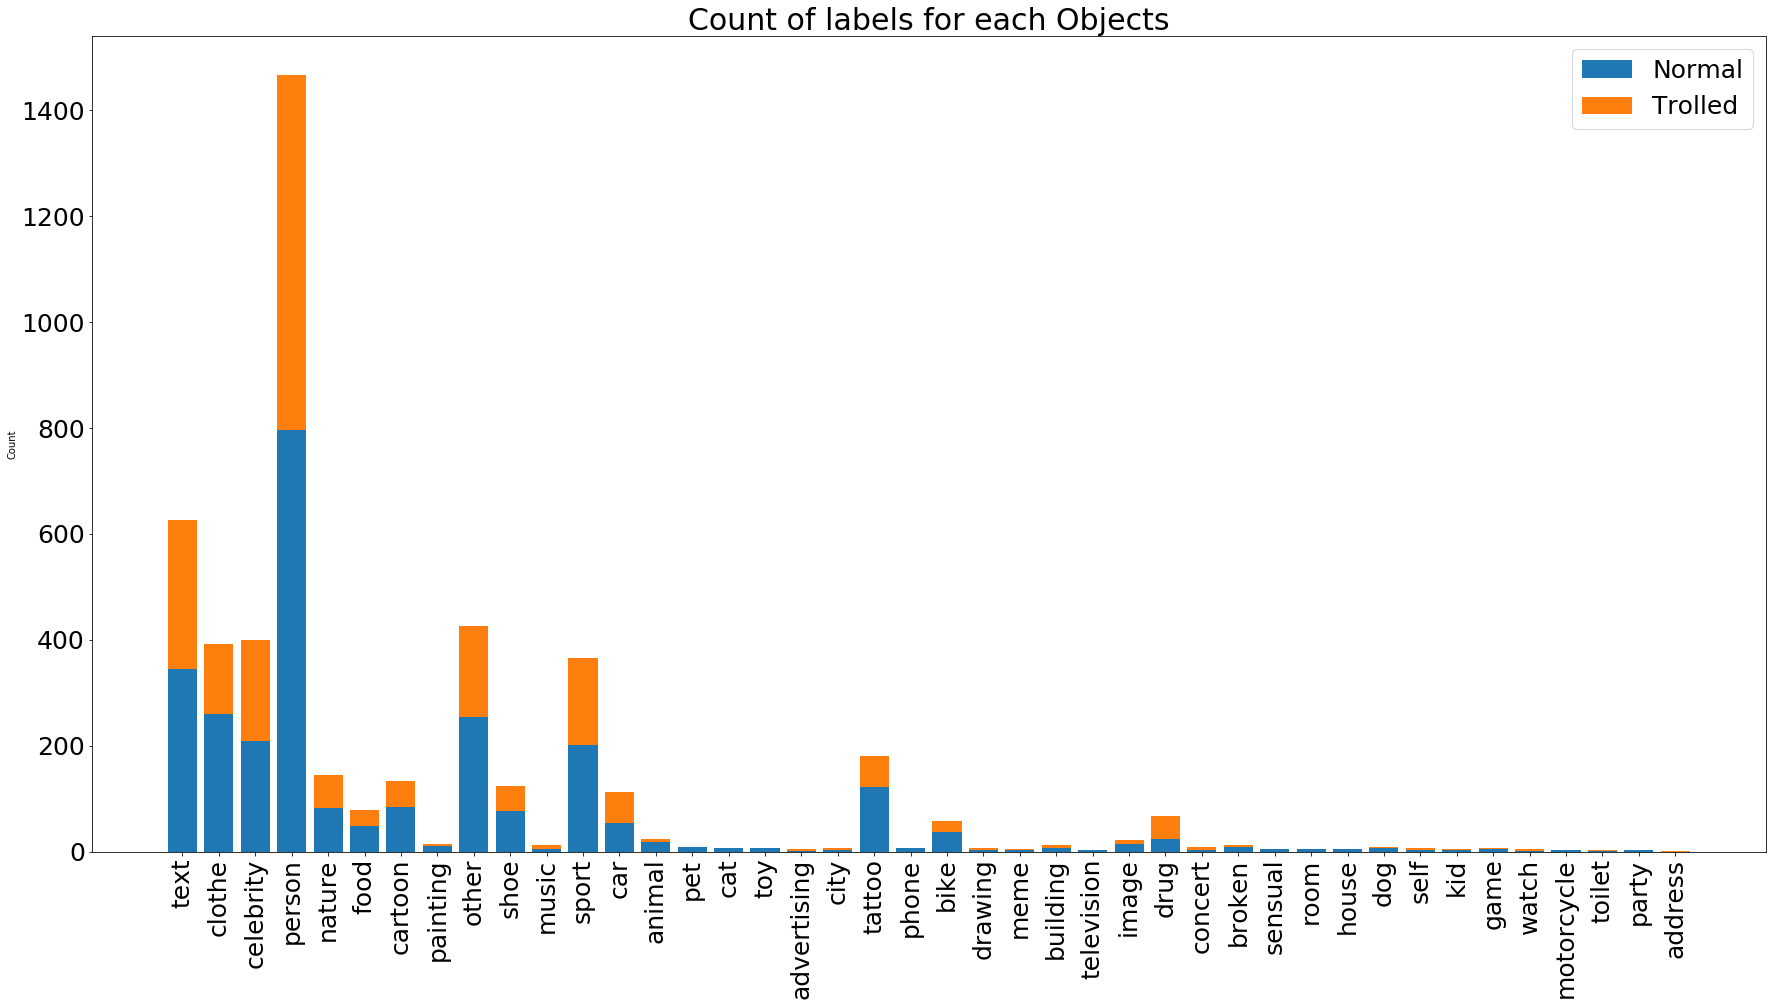

In [37]:
plot_object_label_count(full_data_object_label_count_dict)